   feature_0  feature_1  feature_2  ground_truth
0   0.496714  -0.138264   0.647689             0
1   1.523030  -0.234153  -0.234137             0
2   1.579213   0.767435  -0.469474             0
3   0.542560  -0.463418  -0.465730             0
4   0.241962  -1.913280  -1.724918             0
Confusion Matrix:
[[297   3]
 [  7  13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       300
           1       0.81      0.65      0.72        20

    accuracy                           0.97       320
   macro avg       0.89      0.82      0.85       320
weighted avg       0.97      0.97      0.97       320



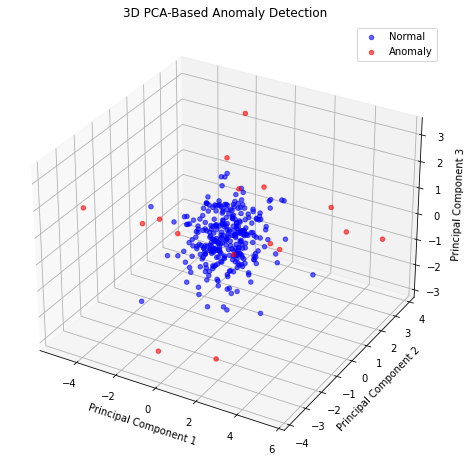

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Create simpler 3D random scattered data
np.random.seed(42)
n_samples = 300
n_features = 3  # Only 3 features for simplicity

# Generate normal data (centered around 0)
normal_data = np.random.normal(loc=0, scale=1, size=(n_samples, n_features))

# Introduce some anomalies (located at the edges)
anomalies = np.random.uniform(low=-5, high=5, size=(20, n_features))  # Uniform distribution for edge anomalies
data = np.vstack([normal_data, anomalies])

# Convert to a DataFrame for easier manipulation
df = pd.DataFrame(data, columns=[f'feature_{i}' for i in range(n_features)])

# Add ground truth labels (1 for anomalies, 0 for normal)
df['ground_truth'] = 0  # Initialize all as normal
df.iloc[-20:, df.columns.get_loc('ground_truth')] = 1  # Last 20 rows are anomalies
print(df.head())

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.drop(columns=['ground_truth']))

# Apply PCA with 3 components
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)

# Convert to DataFrame for easier manipulation
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2', 'PC3'])

# Reconstruct the data from the PCA space
data_reconstructed = pca.inverse_transform(data_pca)

# Calculate the reconstruction error
reconstruction_error = np.sum((data_scaled - data_reconstructed) ** 2, axis=1)

# Add the reconstruction error to the DataFrame
df['reconstruction_error'] = reconstruction_error

# Determine anomalies based on reconstruction error
threshold = np.percentile(df['reconstruction_error'], 95)  # 95th percentile as threshold
df['anomaly'] = df['reconstruction_error'] > threshold

# Add anomaly labels to the PCA DataFrame
df_pca['anomaly'] = df['anomaly']

# Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(df['ground_truth'], df['anomaly']))

print("\nClassification Report:")
print(classification_report(df['ground_truth'], df['anomaly']))

# Visualize the data in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot normal points
ax.scatter(df_pca[~df['anomaly']]['PC1'], 
           df_pca[~df['anomaly']]['PC2'], 
           df_pca[~df['anomaly']]['PC3'], 
           color='blue', label='Normal', alpha=0.6)

# Plot anomalies
ax.scatter(df_pca[df['anomaly']]['PC1'], 
           df_pca[df['anomaly']]['PC2'], 
           df_pca[df['anomaly']]['PC3'], 
           color='red', label='Anomaly', alpha=0.6)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA-Based Anomaly Detection')
ax.legend()
plt.show()